In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [78]:
data=pd.read_csv(r"E:\data trained projects\Advertising.csv")

In [79]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [80]:
data.shape

(200, 5)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [82]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV'>

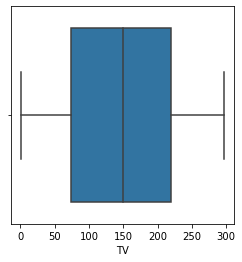

In [83]:
plt.figure(figsize=(4,4))
sns.boxplot(data['TV'])

<AxesSubplot:xlabel='radio'>

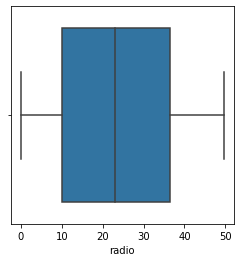

In [84]:
plt.figure(figsize=(4,4))
sns.boxplot(data['radio'])

<AxesSubplot:xlabel='newspaper'>

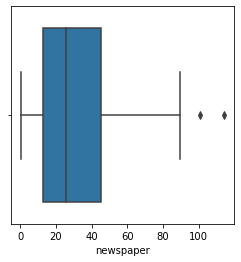

In [85]:
plt.figure(figsize=(4,4))
sns.boxplot(data['newspaper'])

In [86]:
from scipy.stats import zscore
z_score=zscore(data[['newspaper']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)

data=data[filtering_entry]

<AxesSubplot:xlabel='newspaper'>

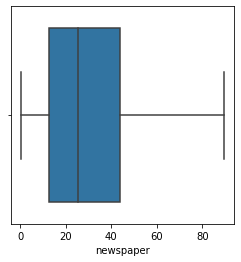

In [87]:
plt.figure(figsize=(4,4))
sns.boxplot(data['newspaper'])

In [88]:
x=data[['TV','radio','newspaper']]
y=data[['sales']]

In [89]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

In [93]:
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
lr_pred=lr.predict(x_test)

In [98]:
from sklearn.metrics import mean_squared_error,r2_score

In [101]:
lr_score= r2_score(y_test,lr_pred)
lr_score

0.9129741169135963

In [105]:
lr_cv_score=cross_val_score(lr,x,y,cv=5,scoring='r2').mean()
lr_cv_score

0.8853605756683912

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn=KNeighborsRegressor()

In [49]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
knn_pred=knn.predict(x_test)

In [107]:
knn_score=r2_score(y_test,knn_pred)
knn_score

-0.7993519907911182

In [109]:
knn_cv_score=cross_val_score(knn,x,y,cv=5,scoring='r2').mean()
knn_cv_score

0.9085884467177154

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt=DecisionTreeRegressor()

In [56]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [57]:
dt_pred=dt.predict(x_test)

In [110]:
dt_score=r2_score(y_test,dt_pred)
dt_score

-0.9551100687471525

In [111]:
dt_cv_score=cross_val_score(dt,x,y,cv=5,scoring='r2').mean()
dt_cv_score

0.949263847221746

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf=RandomForestRegressor()

In [68]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
rf_pred=rf.predict(x_test)

In [112]:
rf_score=r2_score(y_test,rf_pred).mean()
rf_score

-0.7855844757987467

In [114]:
rf_cv_score=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
rf_cv_score

0.9749217622919728

In [ ]:
#as except Linear Regression model, all are models r2 score is in negative which means model is performing extremely poor.
#Therefore, linear Regression is the best model.